In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the data
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


              precision    recall  f1-score   support

           0       0.79      0.93      0.85        99
           1       0.81      0.55      0.65        55

    accuracy                           0.79       154
   macro avg       0.80      0.74      0.75       154
weighted avg       0.80      0.79      0.78       154



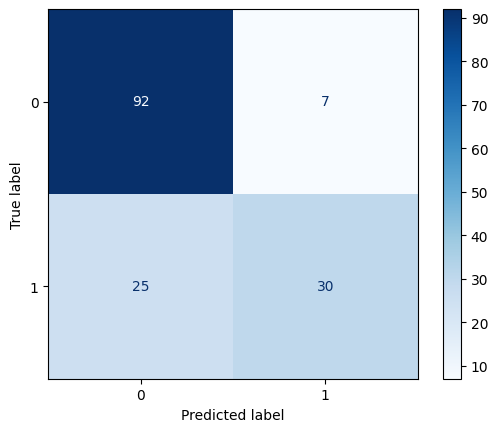

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome', axis=1), data['Outcome'], test_size=0.2, random_state=42)

forest = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)
forest.fit(X_train, y_train)
print(classification_report(y_test, forest.predict(X_test)))
cm = confusion_matrix(y_test, forest.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(forest.predict(X_test)))
disp.plot(cmap=plt.cm.Blues)
plt.show()

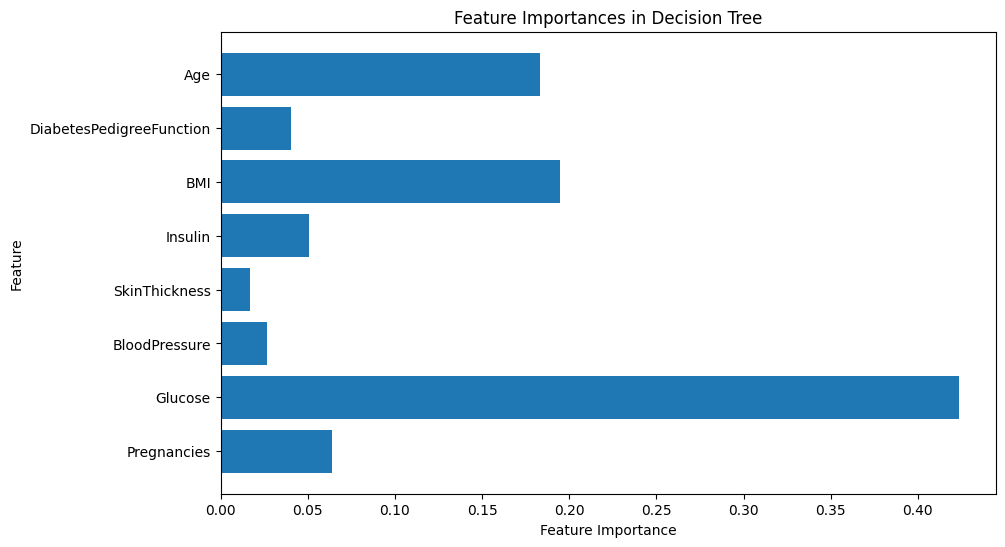

In [4]:
feature_importances = forest.feature_importances_
feature_names = X_train.columns

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_names)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Decision Tree')
plt.show()

# Here you can see about the same Feature Importance as with a Decision Tree

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        99
           1       0.73      0.60      0.66        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



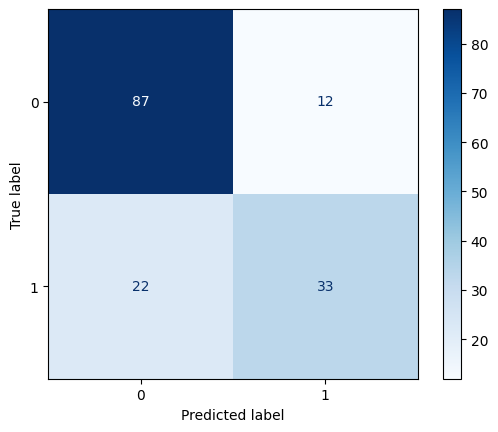

In [35]:
important_features = ['Age', 'BMI', 'Glucose']
filtered_data = data[important_features + ['Outcome']]

X_train, X_test, y_train, y_test = train_test_split(filtered_data.drop('Outcome', axis=1), filtered_data['Outcome'], test_size=0.2, random_state=42)

forest = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
forest.fit(X_train, y_train)
print(classification_report(y_test, forest.predict(X_test)))
cm = confusion_matrix(y_test, forest.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(forest.predict(X_test)))
disp.plot(cmap=plt.cm.Blues)

This made the model slightly worse, so lets get the rest of the Features back and do a GridSearch

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome', axis=1), data['Outcome'], test_size=0.2, random_state=42)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 3, 4, 5],
}

forest = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'max_depth': 5, 'n_estimators': 300}
Best Score: 0.7670811413996493


Looks like Gridsearch want higher values for n_estimators and max_depth

Fitting 3 folds for each of 91 candidates, totalling 273 fits
Best Parameters: {'max_depth': 8, 'n_estimators': 115}
Best Score: 0.7801052128168341
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



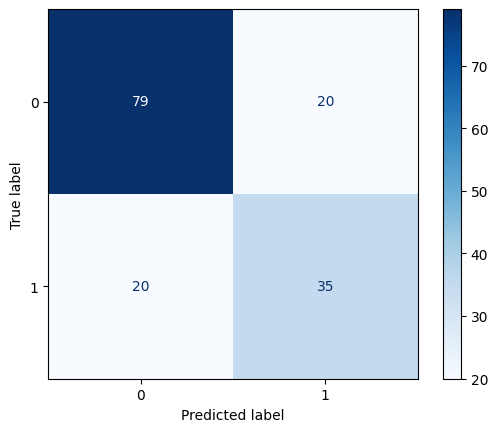

In [56]:
param_grid = {
    'n_estimators': [50, 75, 100, 125, 130, 115, 110, 105, 200, 250, 300, 400, 500],
    'max_depth': [4, 5, 6, 7, 8, 9, 10]
}

forest = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')

optimized_forest = RandomForestClassifier(**best_params, random_state=42)
optimized_forest.fit(X_train, y_train)

# Predict on the test set
y_pred_optimized = optimized_forest.predict(X_test)

# Evaluate the optimized classifier
print(classification_report(y_test, optimized_forest.predict(X_test)))
cm = confusion_matrix(y_test, optimized_forest.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(optimized_forest.predict(X_test)))
disp.plot(cmap=plt.cm.Blues)

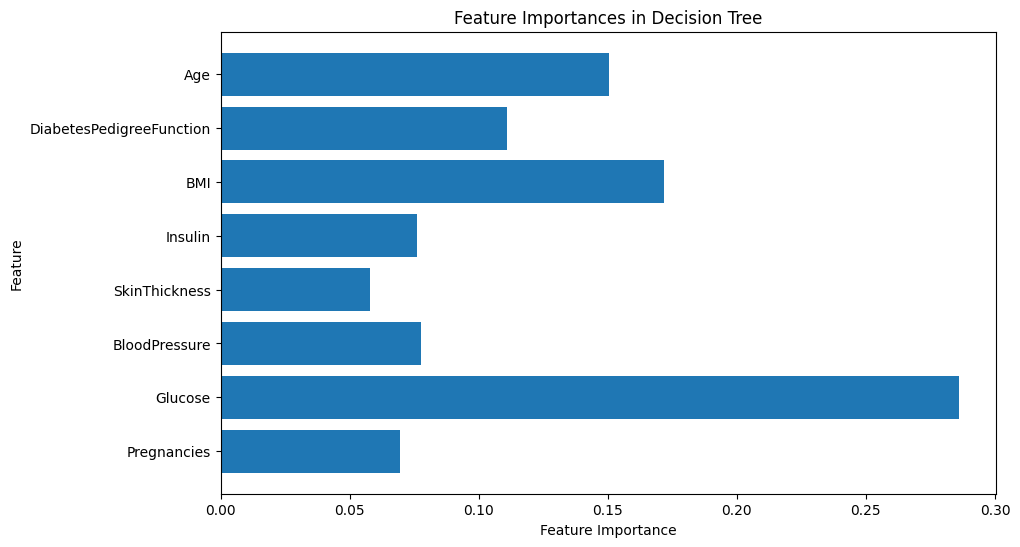

In [57]:
feature_importances = optimized_forest.feature_importances_
feature_names = X_train.columns

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_names)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Decision Tree')
plt.show()